In [1]:
# import required libraries

import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config Completer.use_jedi = False

In [2]:
# read data 

df = pd.read_csv('beeswarmTutorial.csv')
df

,Player,Pos,Squad,90s,Prog
0,Patrick van Aanholt\Patrick-van-Aanholt,DF,Crystal Palace,11.7,76
1,Tammy Abraham\Tammy-Abraham,FW,Chelsea,10.6,11
2,Che Adams\Che-Adams,FW,Southampton,19.0,38
3,Tosin Adarabioyo\Tosin-Adarabioyo,DF,Fulham,18.0,36
4,Adrián\Adrian,GK,Liverpool,2.0,0
...,...,...,...,...,...
492,Andre-Frank Zambo Anguissa\Andre-Frank-Zambo-A...,MF,Fulham,18.7,74
493,Andi Zeqiri\Andi-Zeqiri,FWDF,Brighton,0.8,1
494,Oleksandr Zinchenko\Oleksandr-Zinchenko,DF,Manchester City,7.1,39
495,Hakim Ziyech\Hakim-Ziyech,FWMF,Chelsea,7.0,42


### df dictionary

< Player : name of player>
    
< Pos : player position>
    
< Squad : player team>
    
< 90s : number of played 90 minutes>
    
< Prog : number of progressive passes>

In [3]:
# we need to create a new colomn to include progressive shots per 90 minutes 
df['prog_per_90'] = df ['Prog'] / df['90s']

# remove players with 90s less than 6.5
df = df[df['90s'] > 6.5]

# remove goal keepers
df = df[df['Pos'] != 'GK']

# sort df by prog_per_90
df = df.sort_values('prog_per_90', ascending=False).reset_index()

In [4]:
df_liv = df[df['Squad'] == 'Liverpool']
df_liv = df_liv.sort_values('90s', ascending=False).reset_index()

In [5]:
df_liv

,level_0,index,Player,Pos,Squad,90s,Prog,prog_per_90
0,7,375,Andrew Robertson\Andrew-Robertson,DF,Liverpool,22.9,171,7.467249
1,138,477,Georginio Wijnaldum\Georginio-Wijnaldum,MF,Liverpool,20.7,62,2.995169
2,79,394,Mohamed Salah\Mohamed-Salah,FW,Liverpool,20.4,80,3.921569
3,115,144,Roberto Firmino\Roberto-Firmino,FW,Liverpool,19.8,66,3.333333
4,1,14,Trent Alexander-Arnold\Trent-Alexander-Arnold,DF,Liverpool,19.5,166,8.512821
5,108,273,Sadio Mané\Sadio-Mane,FW,Liverpool,18.8,64,3.404255
6,4,187,Jordan Henderson\Jordan-Henderson,MFDF,Liverpool,17.6,134,7.613636
7,120,139,Fabinho\Fabinho,DFMF,Liverpool,17.4,57,3.275862
8,19,212,Curtis Jones\Curtis-Jones,MF,Liverpool,9.0,55,6.111111
9,0,11,Thiago Alcántara\Thiago-Alcantara,MF,Liverpool,8.3,82,9.879518


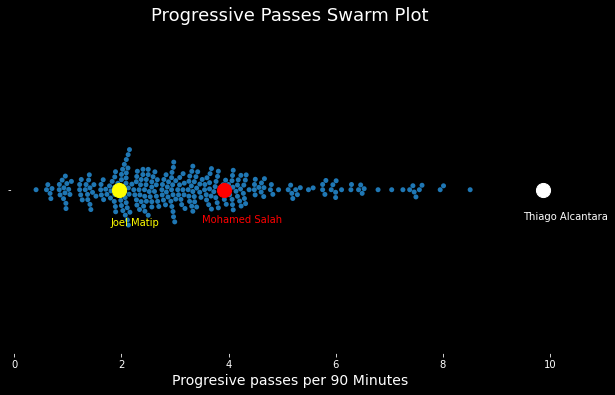

In [38]:
# start ploting
# colors variables
background = 'black'
textcolor = 'white'

# create plot
fig, ax = plt.subplots(figsize = (10,6))

# set fig & axis color
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

# set x and y axies ticks color
mpl.rcParams['xtick.color'] = textcolor
mpl.rcParams['ytick.color'] = textcolor

# plot players using sns
sns.swarmplot(x = 'prog_per_90', data = df, zorder = 1)

# plot highest player
plt.scatter(x = 9.879518, y = 0, c = 'white', s=200, zorder = 2)
ax.annotate(text = 'Thiago Alcantara', xy  = (9.5, 0.09), c = 'w')
# plot mohamed salah
plt.scatter(x = 3.921569, y = 0, c = 'red', s=200, zorder = 2)
ax.annotate(text = 'Mohamed Salah', xy  = (3.5, 0.1), c = 'red')

# plot lowest liverpool player
plt.scatter(x = 1.948052, y = 0, c = 'yellow', s=200, zorder = 2)
ax.annotate(text = 'Joel Matip', xy  = (1.8, .11), c = 'yellow')
# plot title
plt.title('Progressive Passes Swarm Plot', color = 'white', fontsize = 18) 
plt.xlabel('Progresive passes per 90 Minutes', color = 'white', fontsize = 14)
plt.savefig('Swarm_plot1.png');



### lets now use another file we more features to compare between players

In [12]:
# read new file

df2 = pd.read_csv('beeswarm2.csv')
df2

,Player,Nation,Pos,Squad,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog
0,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,11.7,573,705,81.3,9485,4365,1,0.8,0.2,11,43,21,4,76
1,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,10.6,138,201,68.7,1925,327,1,0.9,0.1,8,12,2,0,11
2,Che Adams\Che-Adams,eng ENG,FW,Southampton,19.0,288,413,69.7,4739,1079,4,4.3,-0.3,22,20,12,0,38
3,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,18.0,779,905,86.1,18458,6406,0,0.1,-0.1,3,39,2,0,36
4,Adrián\Adrian,es ESP,GK,Liverpool,2.0,43,62,69.4,1147,723,0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,Andi Zeqiri\Andi-Zeqiri,ch SUI,FWDF,Brighton,0.8,5,11,45.5,89,34,0,0.0,0.0,0,1,1,1,1
493,Oleksandr Zinchenko\Oleksandr-Zinchenko,ua UKR,DF,Manchester City,7.1,572,633,90.4,9341,2526,0,0.1,-0.1,1,43,8,0,39
494,Hakim Ziyech\Hakim-Ziyech,ma MAR,FWMF,Chelsea,7.0,352,470,74.9,6238,1666,3,2.3,0.7,17,33,19,4,42
495,Kurt Zouma\Kurt-Zouma,fr FRA,DF,Chelsea,15.0,1005,1110,90.5,23054,5819,0,0.0,0.0,1,72,2,0,46


As we can see the df require some cleaning :
1. split player name
2. remove GK position and players with less than 6.5 90s
3. optain (prog, KP, 1/3, PPA) per 90s colomns

In [13]:
# df2 cleaning

# split player name
df2['Player'] = df2['Player'].str.split('\\',expand = True)[0]

# remove GK
df2 = df2[df2['Pos'] != 'GK']

# keep only players with 90s greater than 6.5
df2 = df2[df2['90s'] > 6.5]

In [14]:
df2.reset_index()

,index,Player,Nation,Pos,Squad,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog
0,0,Patrick van Aanholt,nl NED,DF,Crystal Palace,11.7,573,705,81.3,9485,4365,1,0.8,0.2,11,43,21,4,76
1,1,Tammy Abraham,eng ENG,FW,Chelsea,10.6,138,201,68.7,1925,327,1,0.9,0.1,8,12,2,0,11
2,2,Che Adams,eng ENG,FW,Southampton,19.0,288,413,69.7,4739,1079,4,4.3,-0.3,22,20,12,0,38
3,3,Tosin Adarabioyo,eng ENG,DF,Fulham,18.0,779,905,86.1,18458,6406,0,0.1,-0.1,3,39,2,0,36
4,6,Ola Aina,ng NGA,DF,Fulham,17.7,782,1013,77.2,15293,6132,0,0.3,-0.3,8,66,11,6,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,490,Wilfried Zaha,ci CIV,FW,Crystal Palace,18.5,381,503,75.7,5524,1211,2,2.0,0.0,15,16,20,3,39
280,491,Andre-Frank Zambo Anguissa,cm CMR,MF,Fulham,18.7,811,949,85.5,13822,3413,3,1.8,1.2,19,102,13,4,74
281,493,Oleksandr Zinchenko,ua UKR,DF,Manchester City,7.1,572,633,90.4,9341,2526,0,0.1,-0.1,1,43,8,0,39
282,494,Hakim Ziyech,ma MAR,FWMF,Chelsea,7.0,352,470,74.9,6238,1666,3,2.3,0.7,17,33,19,4,42


In [15]:
# adjust requierd features colomns values per 90s

features = ['Prog', 'KP', '1/3', 'PPA', 'xA']

for feature in features:
    df2[feature] = df2[feature] / df2['90s']

In [16]:
df2

,Player,Nation,Pos,Squad,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,11.7,573,705,81.3,9485,4365,1,0.068376,0.2,0.940171,3.675214,1.794872,4,6.495726
1,Tammy Abraham,eng ENG,FW,Chelsea,10.6,138,201,68.7,1925,327,1,0.084906,0.1,0.754717,1.132075,0.188679,0,1.037736
2,Che Adams,eng ENG,FW,Southampton,19.0,288,413,69.7,4739,1079,4,0.226316,-0.3,1.157895,1.052632,0.631579,0,2.000000
3,Tosin Adarabioyo,eng ENG,DF,Fulham,18.0,779,905,86.1,18458,6406,0,0.005556,-0.1,0.166667,2.166667,0.111111,0,2.000000
6,Ola Aina,ng NGA,DF,Fulham,17.7,782,1013,77.2,15293,6132,0,0.016949,-0.3,0.451977,3.728814,0.621469,6,3.898305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,Wilfried Zaha,ci CIV,FW,Crystal Palace,18.5,381,503,75.7,5524,1211,2,0.108108,0.0,0.810811,0.864865,1.081081,3,2.108108
491,Andre-Frank Zambo Anguissa,cm CMR,MF,Fulham,18.7,811,949,85.5,13822,3413,3,0.096257,1.2,1.016043,5.454545,0.695187,4,3.957219
493,Oleksandr Zinchenko,ua UKR,DF,Manchester City,7.1,572,633,90.4,9341,2526,0,0.014085,-0.1,0.140845,6.056338,1.126761,0,5.492958
494,Hakim Ziyech,ma MAR,FWMF,Chelsea,7.0,352,470,74.9,6238,1666,3,0.328571,0.7,2.428571,4.714286,2.714286,4,6.000000


In [17]:
# metrics to plot
metrics = ['Prog', 'KP', '1/3', 'PPA', 'xA', 'Cmp%']


 * To create the plot we need to use a for loop to plot each metic on a separate subplot
 * To loop through subplots we need to use zip and we need to flatten our axes using flatten
 * To loop correctly through the plots we need to create counters for rows and colomns and metrics

In [18]:
df2.Player.unique()

array(['Patrick van Aanholt', 'Tammy Abraham', 'Che Adams',
       'Tosin Adarabioyo', 'Ola Aina', 'Rayan Aït Nouri', 'Semi Ajayi',
       'Marc Albrighton', 'Thiago Alcántara', 'Toby Alderweireld',
       'Trent Alexander-Arnold', 'Ezgjan Alioski', 'Allan',
       'Miguel Almirón', 'Steven Alzate', 'Ethan Ampadu',
       'Joachim Andersen', 'Michail Antonio', 'Stuart Armstrong',
       'Pierre-Emerick Aubameyang', 'Serge Aurier', 'Jordan Ayew',
       'Luke Ayling', 'César Azpilicueta', 'Fabián Balbuena',
       'George Baldock', 'Patrick Bamford', 'Ross Barkley',
       'Ashley Barnes', 'Harvey Barnes', 'Kyle Bartley', 'Chris Basham',
       'Michy Batshuayi', 'Jan Bednarek', 'Héctor Bellerín',
       'Saïd Benrahma', 'Christian Benteke', 'Jóhann Berg Guðmundsson',
       'Sander Berge', 'Steven Bergwijn', 'Ryan Bertrand',
       'Yves Bissouma', 'Jayden Bogle', 'Willy Boly', 'Jarrod Bowen',
       'Robbie Brady', 'Rhian Brewster', 'Josh Brownhill', 'Oliver Burke',
       'Dan Burn',

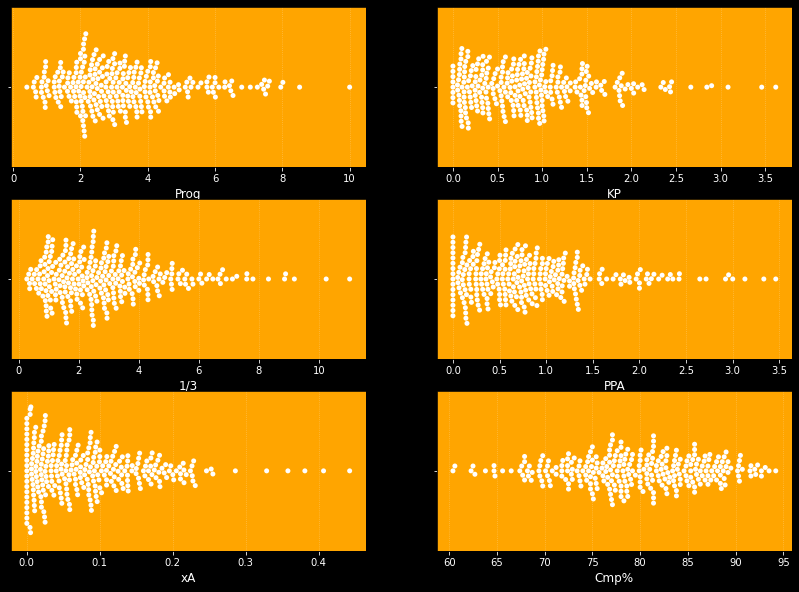

In [39]:
# create 3 X 2 subplot
fig, axes = plt.subplots(3, 2, figsize = (14, 10))

# background colors
fig.set_facecolor('black')
ax.set_facecolor (textcolor)
#ax.grid(color = 'gray')

# spine colors
mpl.rcParams['xtick.color'] = textcolor
mpl.rcParams['ytick.color'] = textcolor

# create three counters before the for loop
rows_counter = 0
colomns_counter = 0
metrics_counter = 0

# loop through subplots
for i, ax in zip(df2['Player'], axes.flatten()):
    ax.set_facecolor('orange')
    ax.grid(ls = 'dotted', color = textcolor, alpha = 0.3, axis = 'x', zorder = 1)
    
    # remove spines
    #spines = ['top', 'bottom', 'left', 'right']
    #for x in spines:
        #if x in spines:
            #ax.spines[x].set_visible(False)
    
    # Swarm plot and x label 
    sns.swarmplot(x=metrics[metrics_counter], 
                  data=df2, 
                  ax=axes[rows_counter, colomns_counter],
                  color = 'white', 
                  zorder = 1)
    ax.set_xlabel(f'{metrics[metrics_counter]}', color = textcolor, fontsize = 12)
    
    
#for p in range(len(df2['Player'])):
    #if df2['Player'][p] == 'Raheem Sterling':
        #ax.scatter(x = df2[metrics[metrics_counter]][p], y = 0, s = 200, c = 'blue', zorder = 2)
    

    # adjust metrics counter to loop to second metric
    metrics_counter += 1
    
    # adjust rows and colomns counter, columns counter needs to go from 0 to 1 first, then back to 0 again  
    if colomns_counter == 0:
        colomns_counter = 1
        continue
    if colomns_counter == 1:
        colomns_counter = 0
        
    # then the rows counter needs to go from 0 to 1    
    rows_counter += 1
